In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [5]:
temp_df = pd.read_csv('dataset.csv')
temp_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
temp_df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [7]:
#cheking NULL Values
temp_df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [8]:
temp_df.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [9]:
temp_df.drop(temp_df[temp_df["Target"]=="Enrolled"].index,inplace=True)

In [10]:
#String to Int for the output
# Enrolled - 1, Graduate - 2, Dropout - 3

def f(s):
    if s == 'Graduate':
        return 1;
    if s == 'Dropout':
        return 2;
    
temp_df.Target = temp_df.Target.apply(f)
temp_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,2
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,2
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [11]:
temp_df.shape

(3630, 35)

In [12]:
X = temp_df.iloc[:,0:34]
Y = temp_df.iloc[:,34]

In [13]:
X.shape, Y.shape

((3630, 34), (3630,))

In [14]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2722, 34), (908, 34), (2722,), (908,))

In [15]:
#Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000000)
logistic_regression.fit(X_train,Y_train)
logistic_regression_train_prediction = logistic_regression.predict(X_train)
logistic_regression_test_prediction = logistic_regression.predict(X_test)
confusion_matrix(Y_train, logistic_regression_train_prediction), confusion_matrix(Y_test, logistic_regression_test_prediction)

(array([[1601,   58],
        [ 165,  898]], dtype=int64),
 array([[529,  21],
        [ 56, 302]], dtype=int64))

C:\Users\d7dhr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


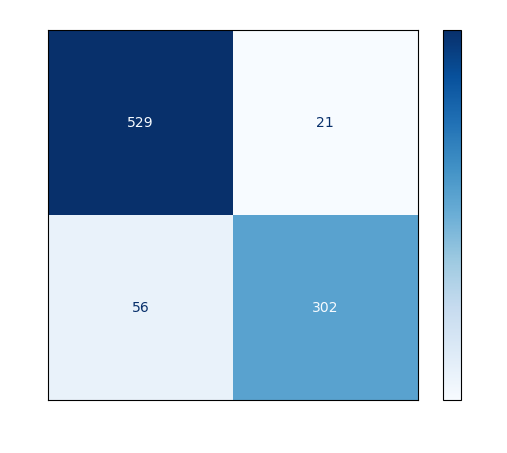

              precision    recall  f1-score   support

           1       0.90      0.96      0.93       550
           2       0.93      0.84      0.89       358

    accuracy                           0.92       908
   macro avg       0.92      0.90      0.91       908
weighted avg       0.92      0.92      0.91       908



In [16]:
color = 'white'
matrix = plot_confusion_matrix(logistic_regression, X_test, Y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()
print(classification_report(Y_test, logistic_regression_test_prediction))

In [17]:
grid_logistic_regression = LogisticRegression(C=2, max_iter=500, solver='saga')
grid_logistic_regression.fit(X_train,Y_train)
grid_logistic_regression_train_prediction = grid_logistic_regression.predict(X_train)
grid_logistic_regression_test_prediction = grid_logistic_regression.predict(X_test)
confusion_matrix(Y_train, grid_logistic_regression_train_prediction), confusion_matrix(Y_test, grid_logistic_regression_test_prediction)

C:\Users\d7dhr\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([[1602,   57],
        [ 164,  899]], dtype=int64),
 array([[528,  22],
        [ 56, 302]], dtype=int64))

C:\Users\d7dhr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


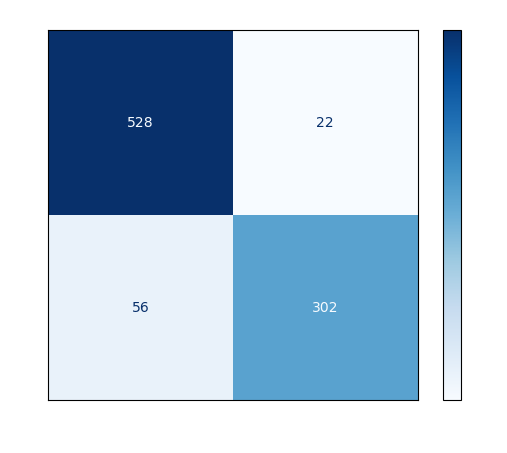

              precision    recall  f1-score   support

           1       0.90      0.96      0.93       550
           2       0.93      0.84      0.89       358

    accuracy                           0.91       908
   macro avg       0.92      0.90      0.91       908
weighted avg       0.92      0.91      0.91       908



In [18]:
color = 'white'
matrix = plot_confusion_matrix(grid_logistic_regression, X_test, Y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()
print(classification_report(Y_test, grid_logistic_regression_test_prediction))

In [ ]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
decision_tree_train_prediction = decision_tree.predict(X_train)
decision_tree_test_prediction = decision_tree.predict(X_test)
confusion_matrix(Y_train, decision_tree_train_prediction), confusion_matrix(Y_test, decision_tree_test_prediction)

In [ ]:
color = 'white'
matrix = plot_confusion_matrix(decision_tree, X_test, Y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()
print(classification_report(Y_test, decision_tree_test_prediction))

In [ ]:
grid_decision_tree = DecisionTreeClassifier(max_depth=5, random_state=1024)
grid_decision_tree.fit(X_train,Y_train)
grid_decision_tree_train_prediction = grid_decision_tree.predict(X_train)
grid_decision_tree_test_prediction = grid_decision_tree.predict(X_test)
confusion_matrix(Y_train, grid_decision_tree_train_prediction), confusion_matrix(Y_test, grid_decision_tree_test_prediction)

In [ ]:
color = 'white'
matrix = plot_confusion_matrix(grid_decision_tree, X_test, Y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()
print(classification_report(Y_test, grid_decision_tree_test_prediction))

In [ ]:
feature_names_arr = ['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Nationality', "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment',
       'International', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
       'Unemployment rate', 'Inflation rate', 'GDP']

In [ ]:
import pydotplus
dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names_arr, class_names=['Dropout', 'Graduate', 'Enrolled'])
graph = pydotplus.graph_from_dot_data(dot_data) # pydotplus return graph object of .dot file
graph.write_pdf('data_vis.pdf')    

In [ ]:
#KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,Y_train)
knn_classifier_train_prediction = knn_classifier.predict(X_train)
knn_classifier_test_prediction = knn_classifier.predict(X_test)
confusion_matrix(Y_train, knn_classifier_train_prediction), confusion_matrix(Y_test, knn_classifier_test_prediction)

In [ ]:
color = 'white'
matrix = plot_confusion_matrix(knn_classifier, X_test, Y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()
print(classification_report(Y_test, knn_classifier_test_prediction))

In [ ]:
#Support Vector Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train,Y_train)
svm_classifier_train_prediction = svm_classifier.predict(X_train)
svm_classifier_test_prediction = svm_classifier.predict(X_test)
confusion_matrix(Y_train, svm_classifier_train_prediction), confusion_matrix(Y_test, svm_classifier_test_prediction)

In [ ]:
color = 'white'
matrix = plot_confusion_matrix(svm_classifier, X_test, Y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()
print(classification_report(Y_test, svm_classifier_test_prediction))

In [ ]:
#Grid Search Result
grid_svm_classifier = SVC(C=100, gamma=0.0001)
grid_svm_classifier.fit(X_train,Y_train)
grid_svm_classifier_train_prediction = grid_svm_classifier.predict(X_train)
grid_svm_classifier_test_prediction = grid_svm_classifier.predict(X_test)
confusion_matrix(Y_train, grid_svm_classifier_train_prediction), confusion_matrix(Y_test, grid_svm_classifier_test_prediction)

In [ ]:
color = 'white'
matrix = plot_confusion_matrix(grid_svm_classifier, X_test, Y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()
print(classification_report(Y_test, grid_svm_classifier_test_prediction))

In [ ]:
#Grid Search
clf = LogisticRegression()
grid = {'C' : [1,2,3,4,5] , 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] , 'max_iter' : [100,300,500,700]}
abc = GridSearchCV(clf, grid)
abc.fit(X_train, Y_train)

In [ ]:
abc.best_estimator_

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, Y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid_search_logistic_regression_train_prediction = abc.predict(X_train)
grid_search_logistic_regression_test_prediction = abc.predict(X_test)
confusion_matrix(Y_train, grid_search_logistic_regression_train_prediction), confusion_matrix(Y_test, grid_search_logistic_regression_test_prediction)

In [ ]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, Y_train)

In [ ]:
grid_search.best_estimator_